In [1]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

In [44]:
import configuration # Load Key from config.py
# Replace <Subscription Key> with your valid subscription key.
subscription_key = configuration.subscription_key
assert subscription_key

In [35]:
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"
analyze_url = vision_base_url + "analyze"

In [52]:
# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/" + \
    "Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

In [53]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [54]:
# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(json.dumps(response.json()))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

{"categories": [{"name": "outdoor_", "score": 0.00390625, "detail": {"landmarks": []}}, {"name": "outdoor_street", "score": 0.33984375, "detail": {"landmarks": []}}], "color": {"dominantColorForeground": "Brown", "dominantColorBackground": "Brown", "dominantColors": ["Brown"], "accentColor": "B54316", "isBwImg": false}, "description": {"tags": ["building", "outdoor", "street", "city", "people", "busy", "table", "walking", "traffic", "filled", "large", "many", "group", "night", "light", "crowded", "bunch", "standing", "man", "sign", "crowd", "umbrella", "riding", "tall", "woman", "bus"], "captions": [{"text": "a group of people on a city street at night", "confidence": 0.9122244462952912}]}, "requestId": "5fdc191b-4ac8-476a-85af-79f4a1c6fa56", "metadata": {"width": 450, "height": 600, "format": "Jpeg"}}


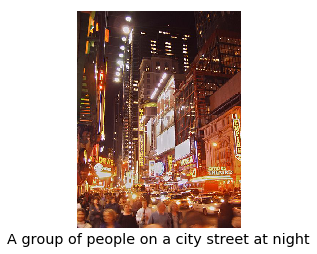

In [55]:
# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()